Fitting 3 folds for each of 4 candidates, totalling 12 fits
Top 4 Results:
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1      12.607774      0.209492         0.240654        0.042904   
0       6.506290      0.017882         0.088250        0.004031   
2       8.127947      0.888870         0.092533        0.018974   
3      16.209384      0.378009         0.150688        0.026589   

  param_bootstrap param_max_depth param_min_samples_leaf  \
1            True               9                      5   
0            True               9                      5   
2           False               9                      5   
3           False               9                      5   

  param_min_samples_split param_n_estimators  \
1                       5                200   
0                       5                100   
2                       5                100   
3                       5                200   

                                              p

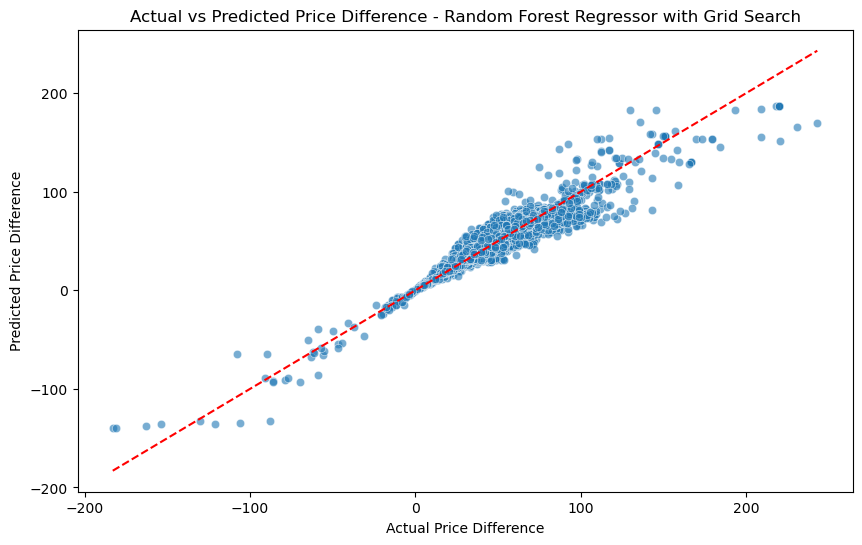

In [2]:
# grid_search_random_forest.py
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the prepared data
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [9],
    'min_samples_split': [5],
    'min_samples_leaf': [5],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get all the results
cv_results = pd.DataFrame(grid_search.cv_results_)

# Sort the results by rank test score (best first)
cv_results = cv_results.sort_values(by='rank_test_score')

# Print the top 4 results
print("Top 4 Results:")
print(cv_results.head(4))

# Best parameters from Grid Search
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Best estimator
best_rf = grid_search.best_estimator_

# Predictions using the best estimator
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_r2 = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

results = {
    'Model': 'Random Forest Regressor with Grid Search',
    'Best Parameters': best_params,
    'Train R2': train_r2,
    'Train RMSE': train_rmse,
    'Train MSE': train_mse,
    'Train MAE': train_mae,
    'Test R2': test_r2,
    'Test RMSE': test_rmse,
    'Test MSE': test_mse,
    'Test MAE': test_mae
}

# Display results
print("Results for Random Forest Regressor with Grid Search:")
print(results)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Price Difference')
plt.ylabel('Predicted Price Difference')
plt.title('Actual vs Predicted Price Difference - Random Forest Regressor with Grid Search')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()


## The Random Forest Regressor with Grid Search achieved strong performance, with the best parameters being bootstrap: True, max_depth: 9, min_samples_leaf: 5, min_samples_split: 5, and n_estimators: 200. The model showed high accuracy with a Train R2 of 0.921 and Test R2 of 0.908. The error metrics indicated low error rates, with Train RMSE of 7.11 and Test RMSE of 7.99.

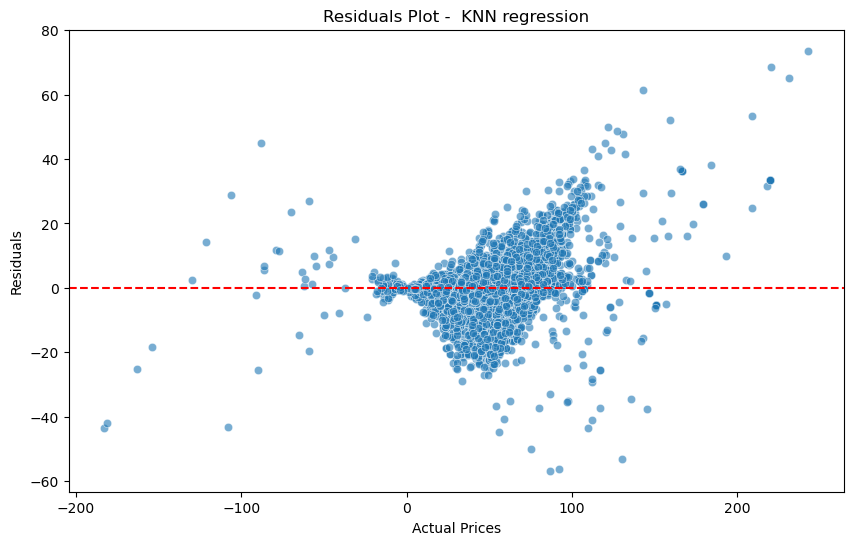

In [3]:


#Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot -  KNN regression')
plt.show()
